## Exploring the Response Variable and Concluding the Initial Exploration

In [1]:
import pandas as pd

Read clean dataset:

In [2]:
df = pd.read_csv('../chapter1/Chapter_1_cleaned_data.csv')

View class count of the response variable:

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [4]:
df['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [5]:
df['default payment next month'].mean()

0.2217971797179718

So 22% of the data is labeled as positive. We have an imbalanced dataset, but it is not very serious (there are some problems in which we have to work with only 1%)

## Introduction to Scikit-Learn 

### Logistic regression with scikit-learn

Import LogisticRegression model form sklearn.linear_model:

In [6]:
from sklearn.linear_model import LogisticRegression

Instantiating a model in scikit learn:

In [7]:
my_lr = LogisticRegression()

In [8]:
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We have instantiated the model with all the default options.

Now we will select 10 samples to train the model.
- X has to have shape (# samples, # features)
- y has to have shape (# samples)

In [9]:
X = df['EDUCATION'][:10].values.reshape(-1,1)

In [10]:
X[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [11]:
y = df['default payment next month'][:10].values

In [12]:
y[:5]

array([1, 1, 0, 0, 0])

Next we can fit a model:

In [13]:
my_lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can select new samples to test the model on:

In [14]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)

In [15]:
new_y = df['default payment next month'][10:20].values

And finally we can predict the default payment for the new features:

In [16]:
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

And compare it with the actual default payment:

In [17]:
new_y

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

### Linear regression with scikit-learn

####  Generating synthetic data

First you set a seed for the random number generator:

In [18]:
import numpy as np

In [19]:
np.random.seed(seed=1)

Next we generate a random vector X:

In [20]:
X = np.random.uniform(low=0.0, high=10.0, size=(1000,1))

In [21]:
X[0:10]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00],
       [9.23385948e-01],
       [1.86260211e+00],
       [3.45560727e+00],
       [3.96767474e+00],
       [5.38816734e+00]])

Now we need to generate a response variable for the **linear regression data**.

For linear regresssion one assumes: y = ax + b + error, where the error is gaussian.

In [22]:
slope = 0.25
intercept = -1.25
# loc is the mean and scale is the stdev
error = np.random.normal(loc=0.0, scale=1.0, size=(1000,1))
y = slope*X + intercept + error

Now we would like to visualize the data:

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

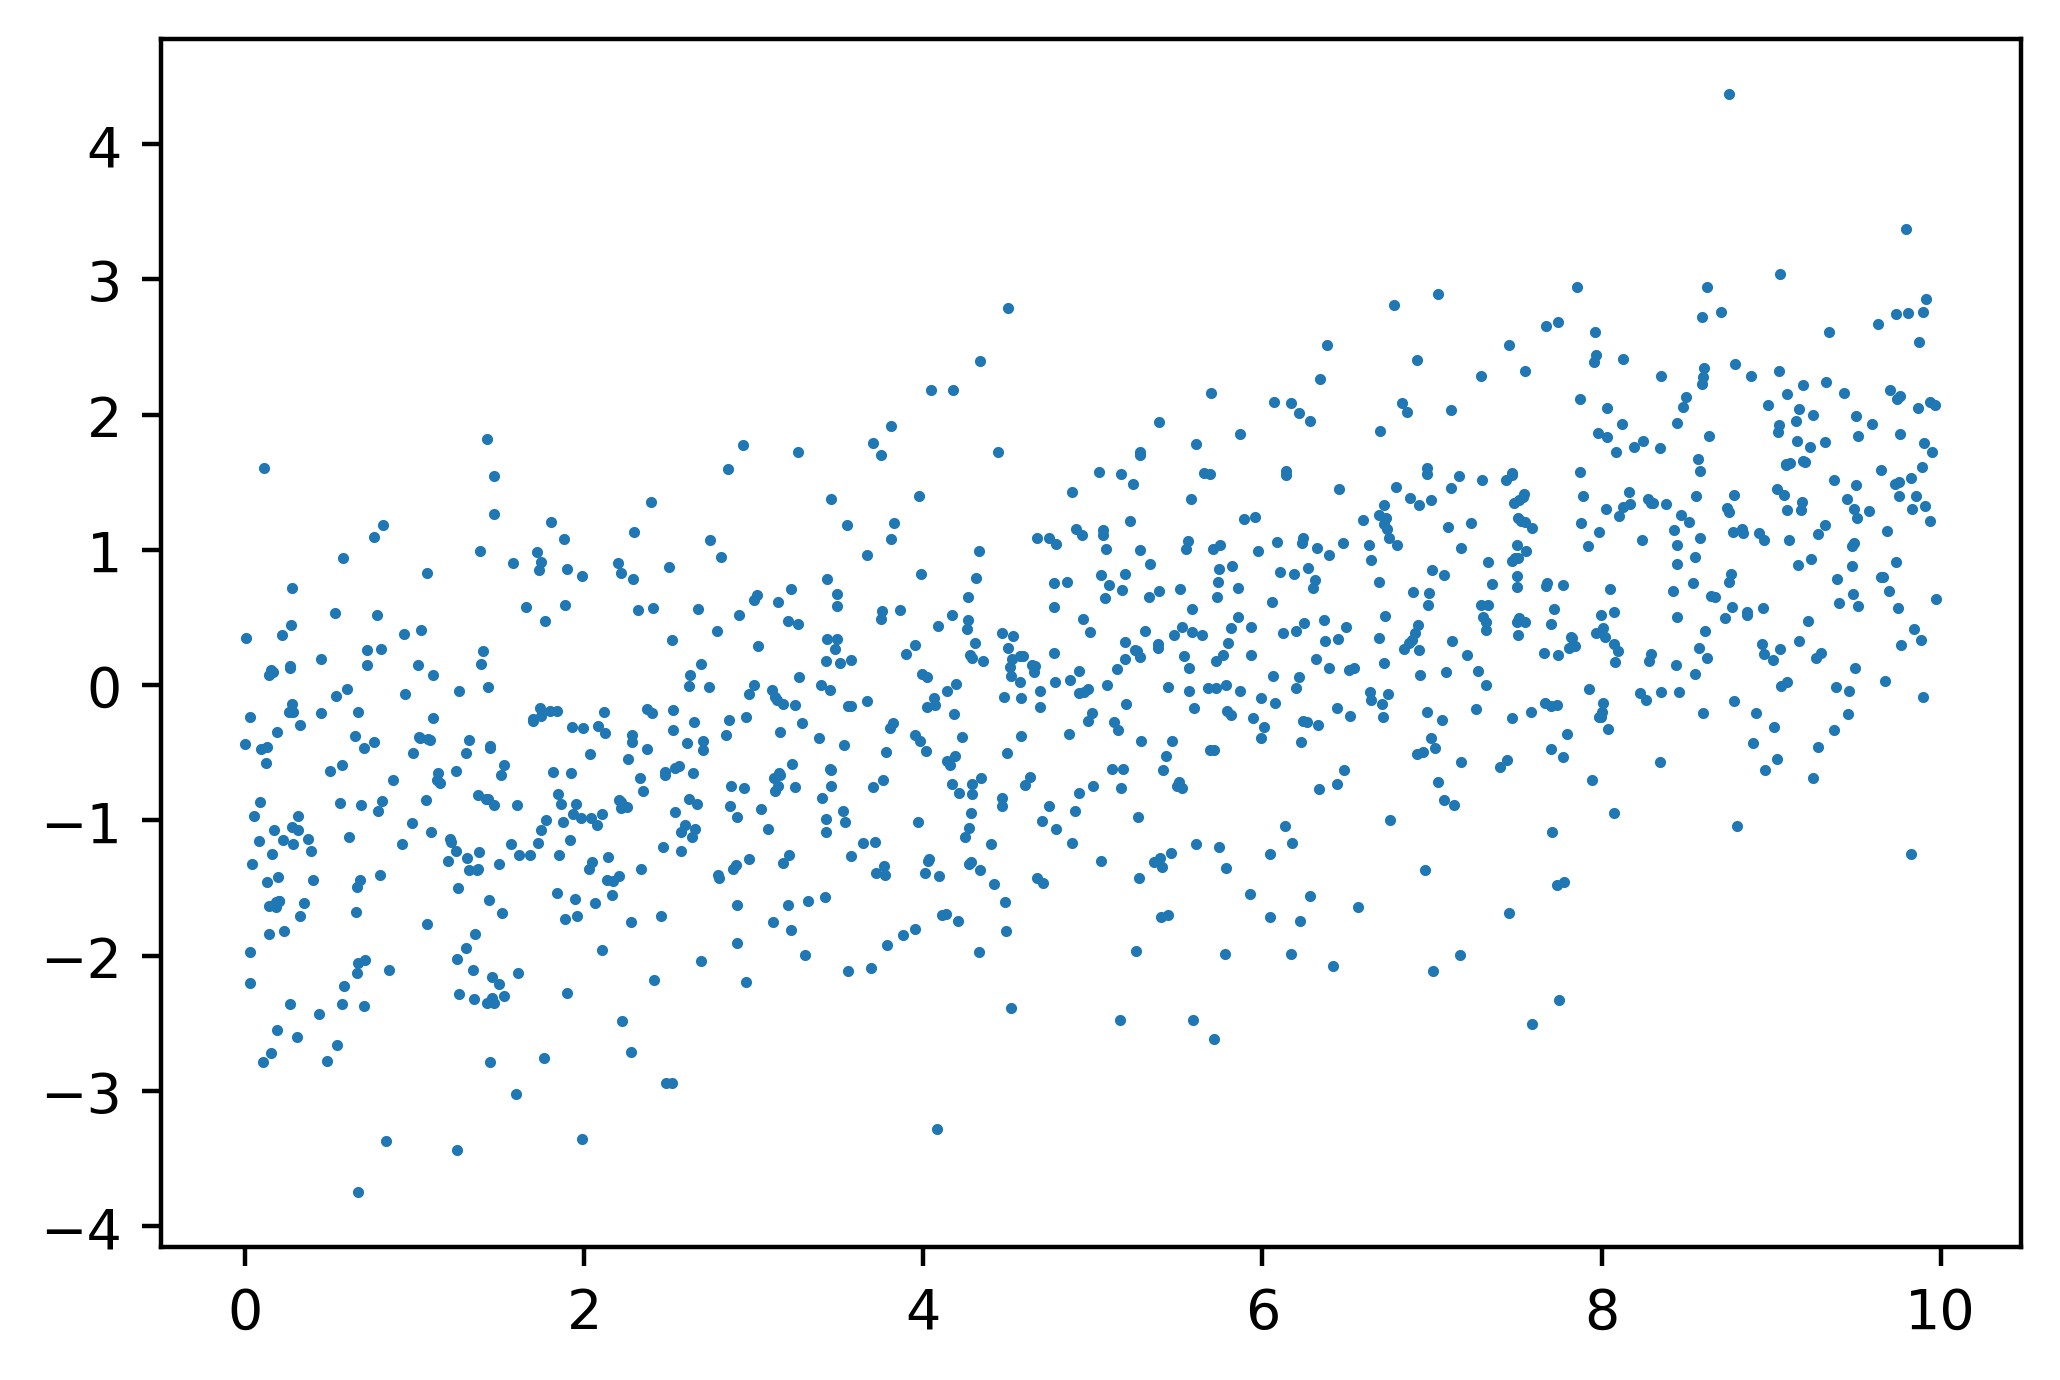

In [24]:
plt.scatter(X, y, s=1)

#### Linear regression in scikit learn

Instantiate the model:

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg = LinearRegression()

In [27]:
lin_reg #fit_intercept is by default true

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train model with data:

In [28]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Examine the coefficients:

In [29]:
lin_reg.intercept_

array([-1.20800219])

In [30]:
lin_reg.coef_

array([[0.25106337]])

Predict the response variable for the data:

In [31]:
y_pred = lin_reg.predict(X.reshape(-1,1))

Visualize the actual data and the predictions:

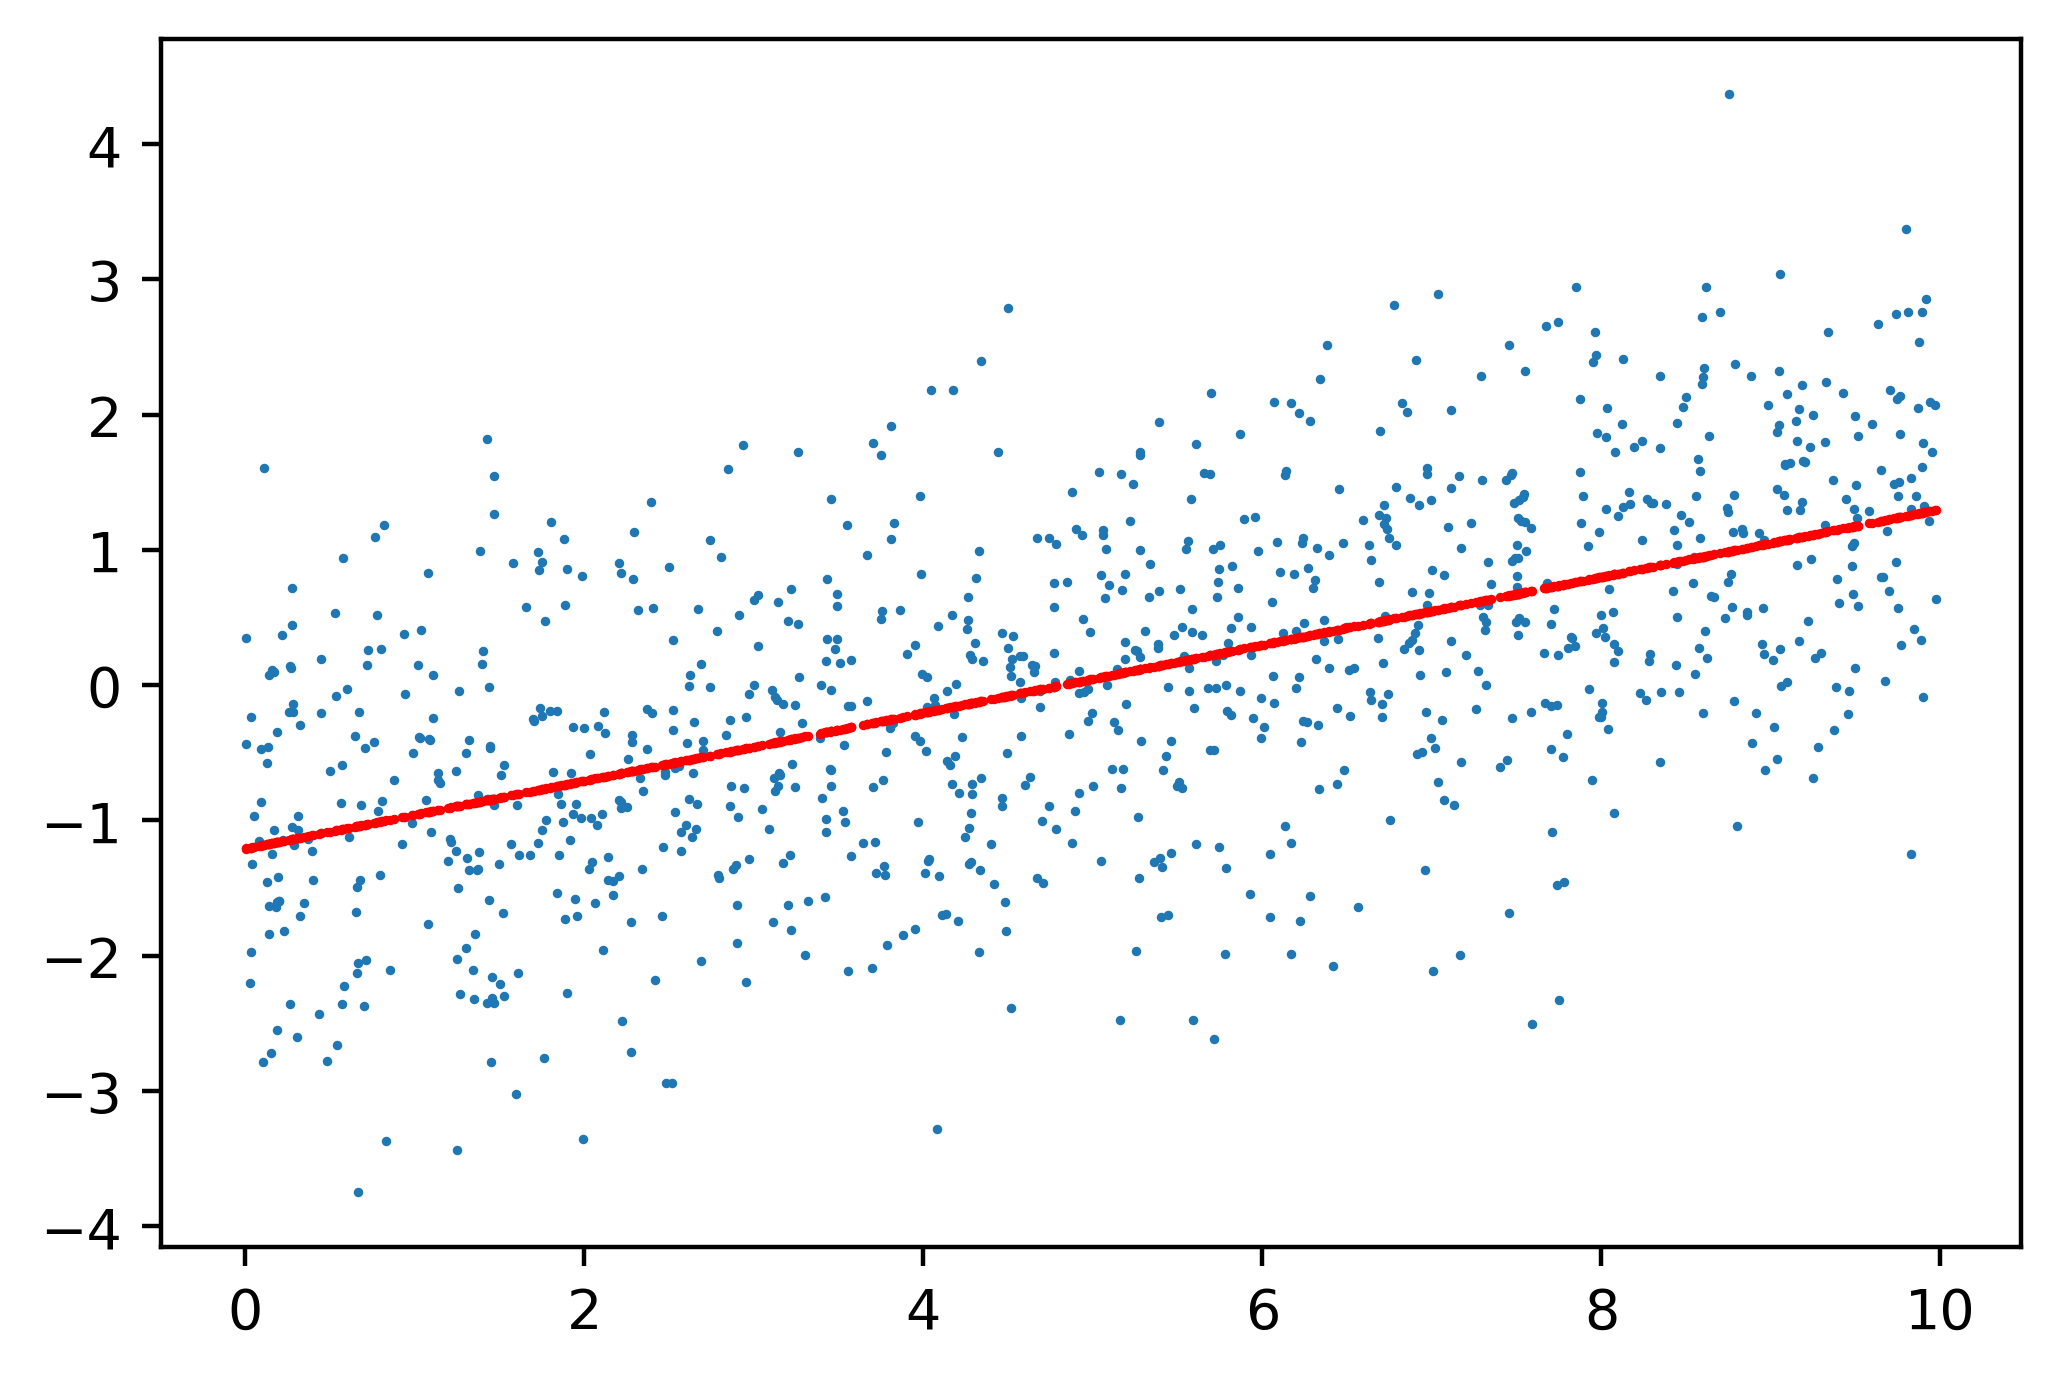

In [32]:
plt.scatter(X, y, s=0.5)
plt.scatter(X, y_pred, s=0.5, c='red')

## Model performance metrics for binary classification

###  Splitting the data: training and testing sets

Import the module from sklearn to perform train/test split:

In [33]:
from sklearn.model_selection import train_test_split

Get the feature and response variable:

In [34]:
X = df['EDUCATION'].values.reshape(-1,1)
y = df['default payment next month'].values

Perform the train/test split:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=24)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


Look at the class distribution:

In [37]:
np.mean(y_train)

0.223102526838873

In [38]:
np.mean(y_test)

0.21657603600225014

They have approximately 22% each.

### Classification Accuracy

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
example_lr = LogisticRegression()

In [41]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = example_lr.predict(X_test)

#### Accuracy: proportion of samples correctly classified

1) Calculate accuracy manually:

In [43]:
is_correct = y_pred == y_test

In [44]:
np.mean(is_correct)

0.7834239639977498

The model is correct 78% of the time.

2) Calculate accuracy with .score:

In [45]:
example_lr.score(X_test, y_test)

0.7834239639977498

3) Use sklearn metrics:

In [46]:
from sklearn import metrics

In [47]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

### Exercise 9: Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python

In [48]:
P = sum(y_test)
P

1155

In [49]:
N = len(y_test) - P
N

4178

In [50]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [51]:
TPR = TP/P
TPR

0.0

In [52]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [53]:
FNR = FN/P
FNR

1.0

In [54]:
TN = sum( (y_test==0) & (y_pred==0) )
TN

4178

In [55]:
FP  =sum( (y_test==0) & (y_pred==1) )
FP

0

In [56]:
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [57]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

## Exercise 10: Obtaining Predicted Probabilities from a Trained Logistic Regression Model

We can access the predicted probabilities of a logistic regression with the .predict_proba() method:

In [58]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba # the output is an array (#samples, 2)

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

Visualize probability for the positive class (default):

In [59]:
pos_proba = y_pred_proba[:,1]

Text(0, 0.5, 'Number of samples')

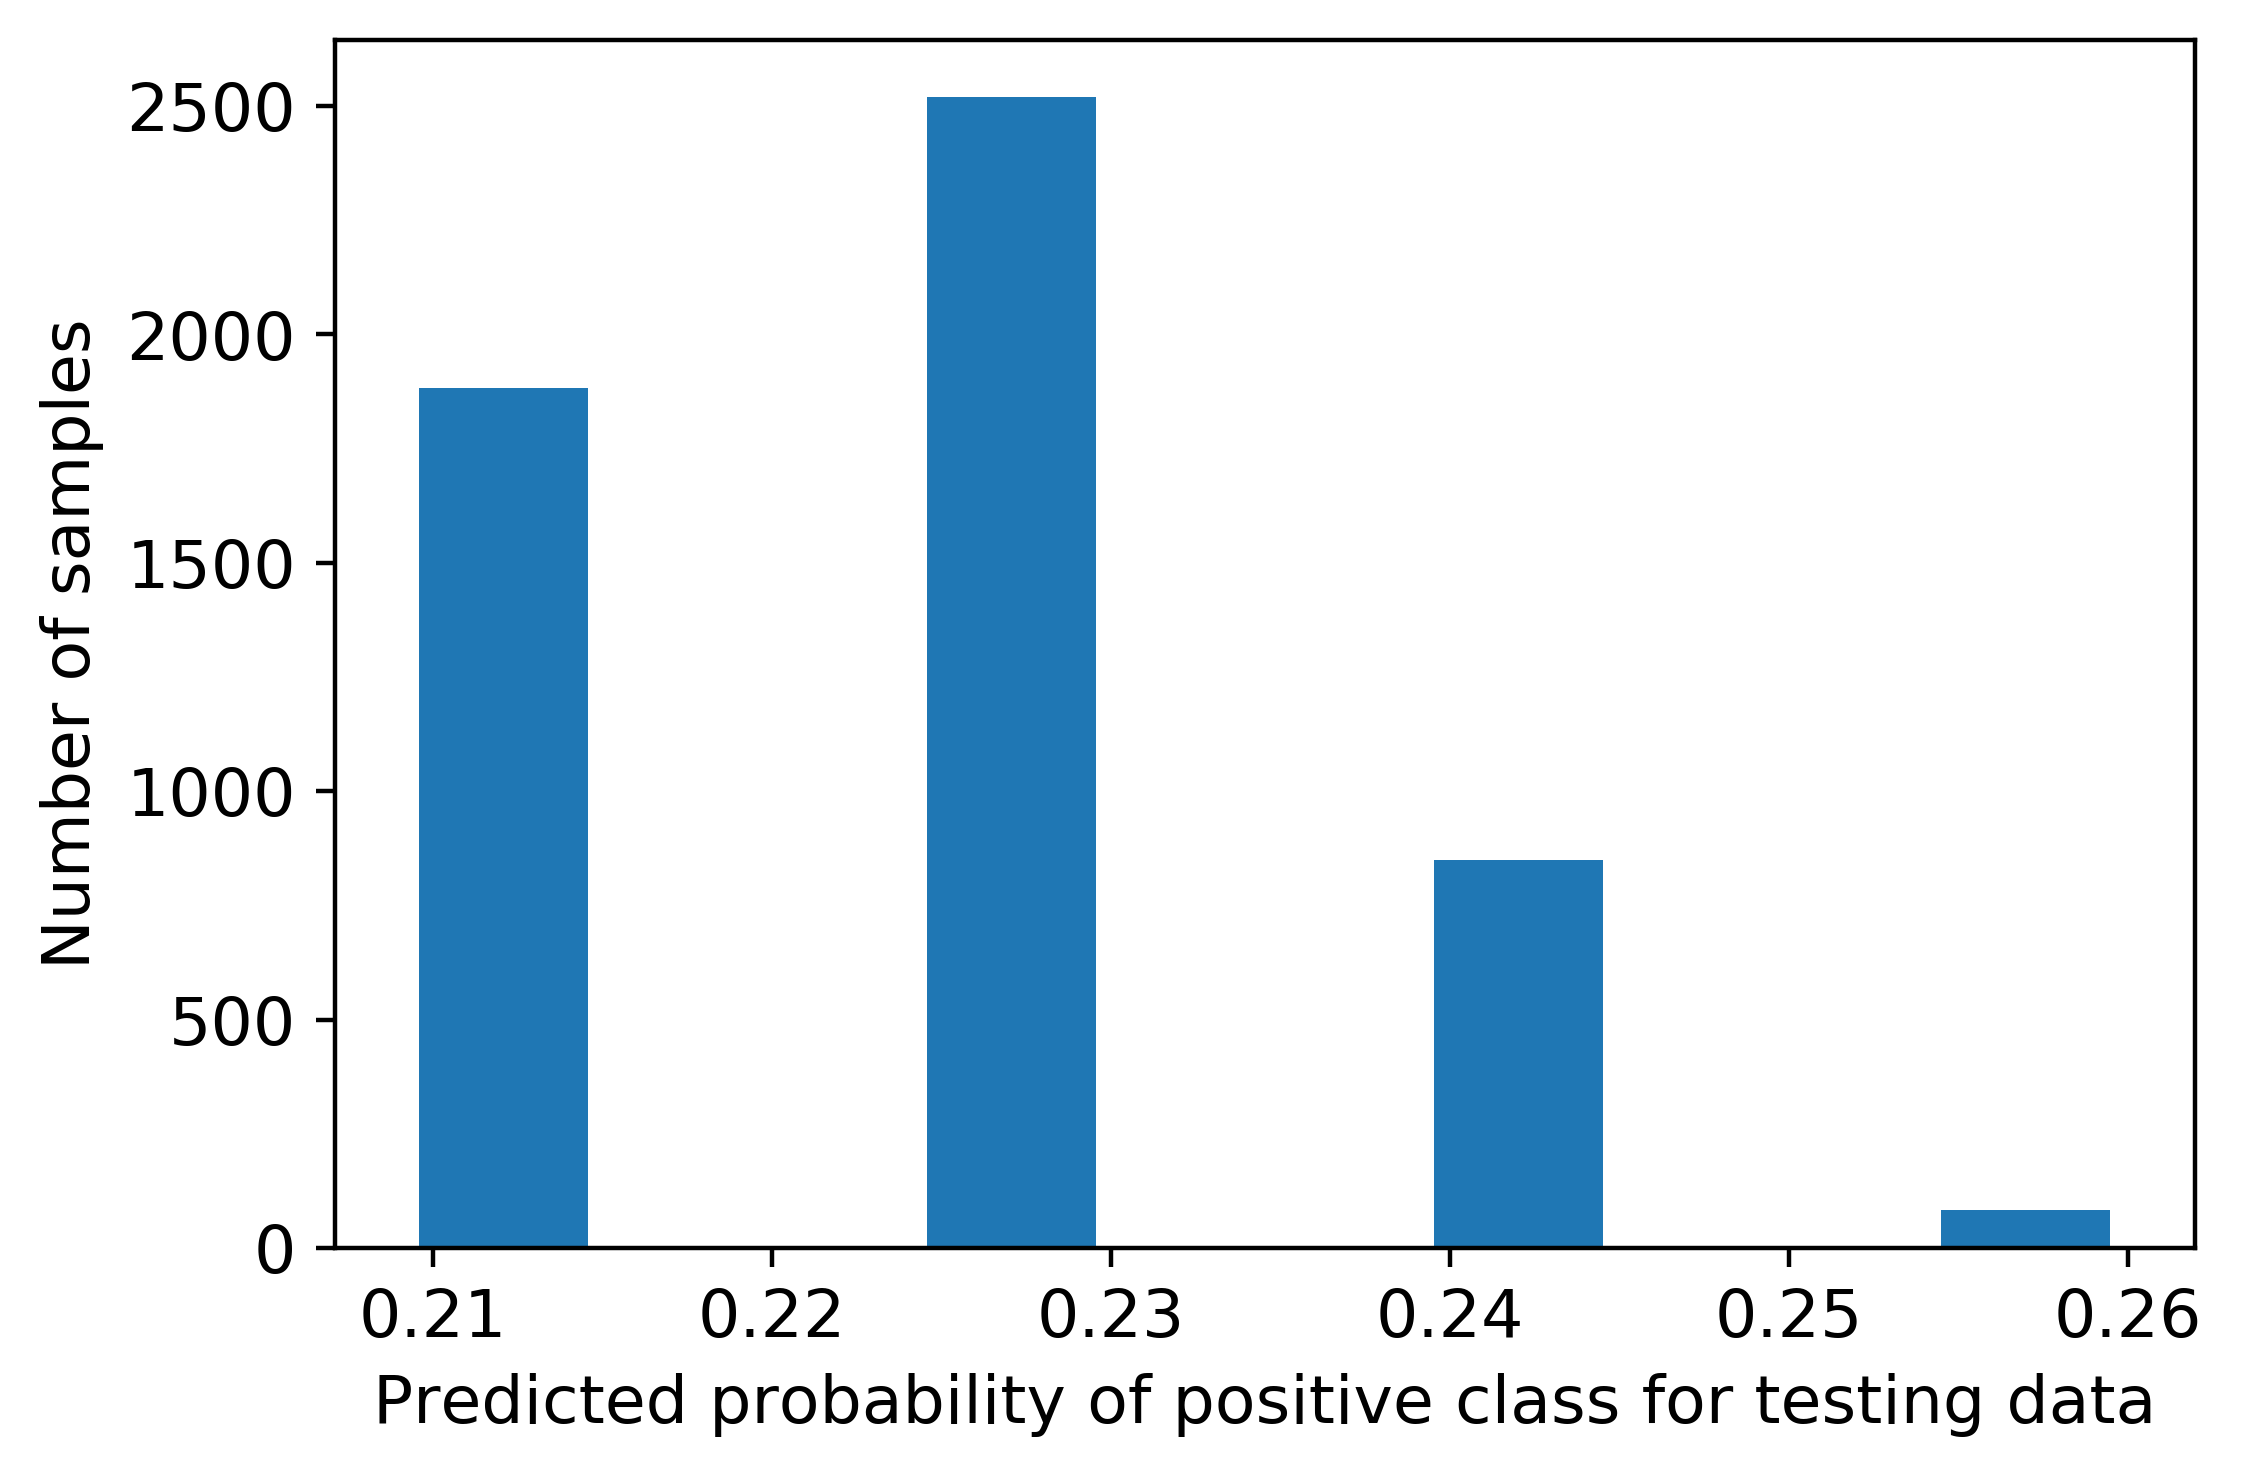

In [61]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

Notice that there are only 4 bins with samples in them. That is because the EDUCATION feature can only take 4 values.

Also notice that all the probabilities are above 0.5, which is the default **threshold** in scikit-learn. That is why all the samples get labeled as negative.

If we changed the threshold to 0.25, we would have some positively predicted samples. To see whether this would improve performance or not, we can look at the stacked histogram. That is, we split each bar with the actual positive samples and negative samples:

In [62]:
pos_samples = y_test == 1
neg_samples = y_test == 0
pos_sample_pos_proba = y_pred_proba[pos_samples,1]
neg_sample_neg_proba = y_pred_proba[neg_samples,1]

Text(0, 0.5, 'Number of samples')

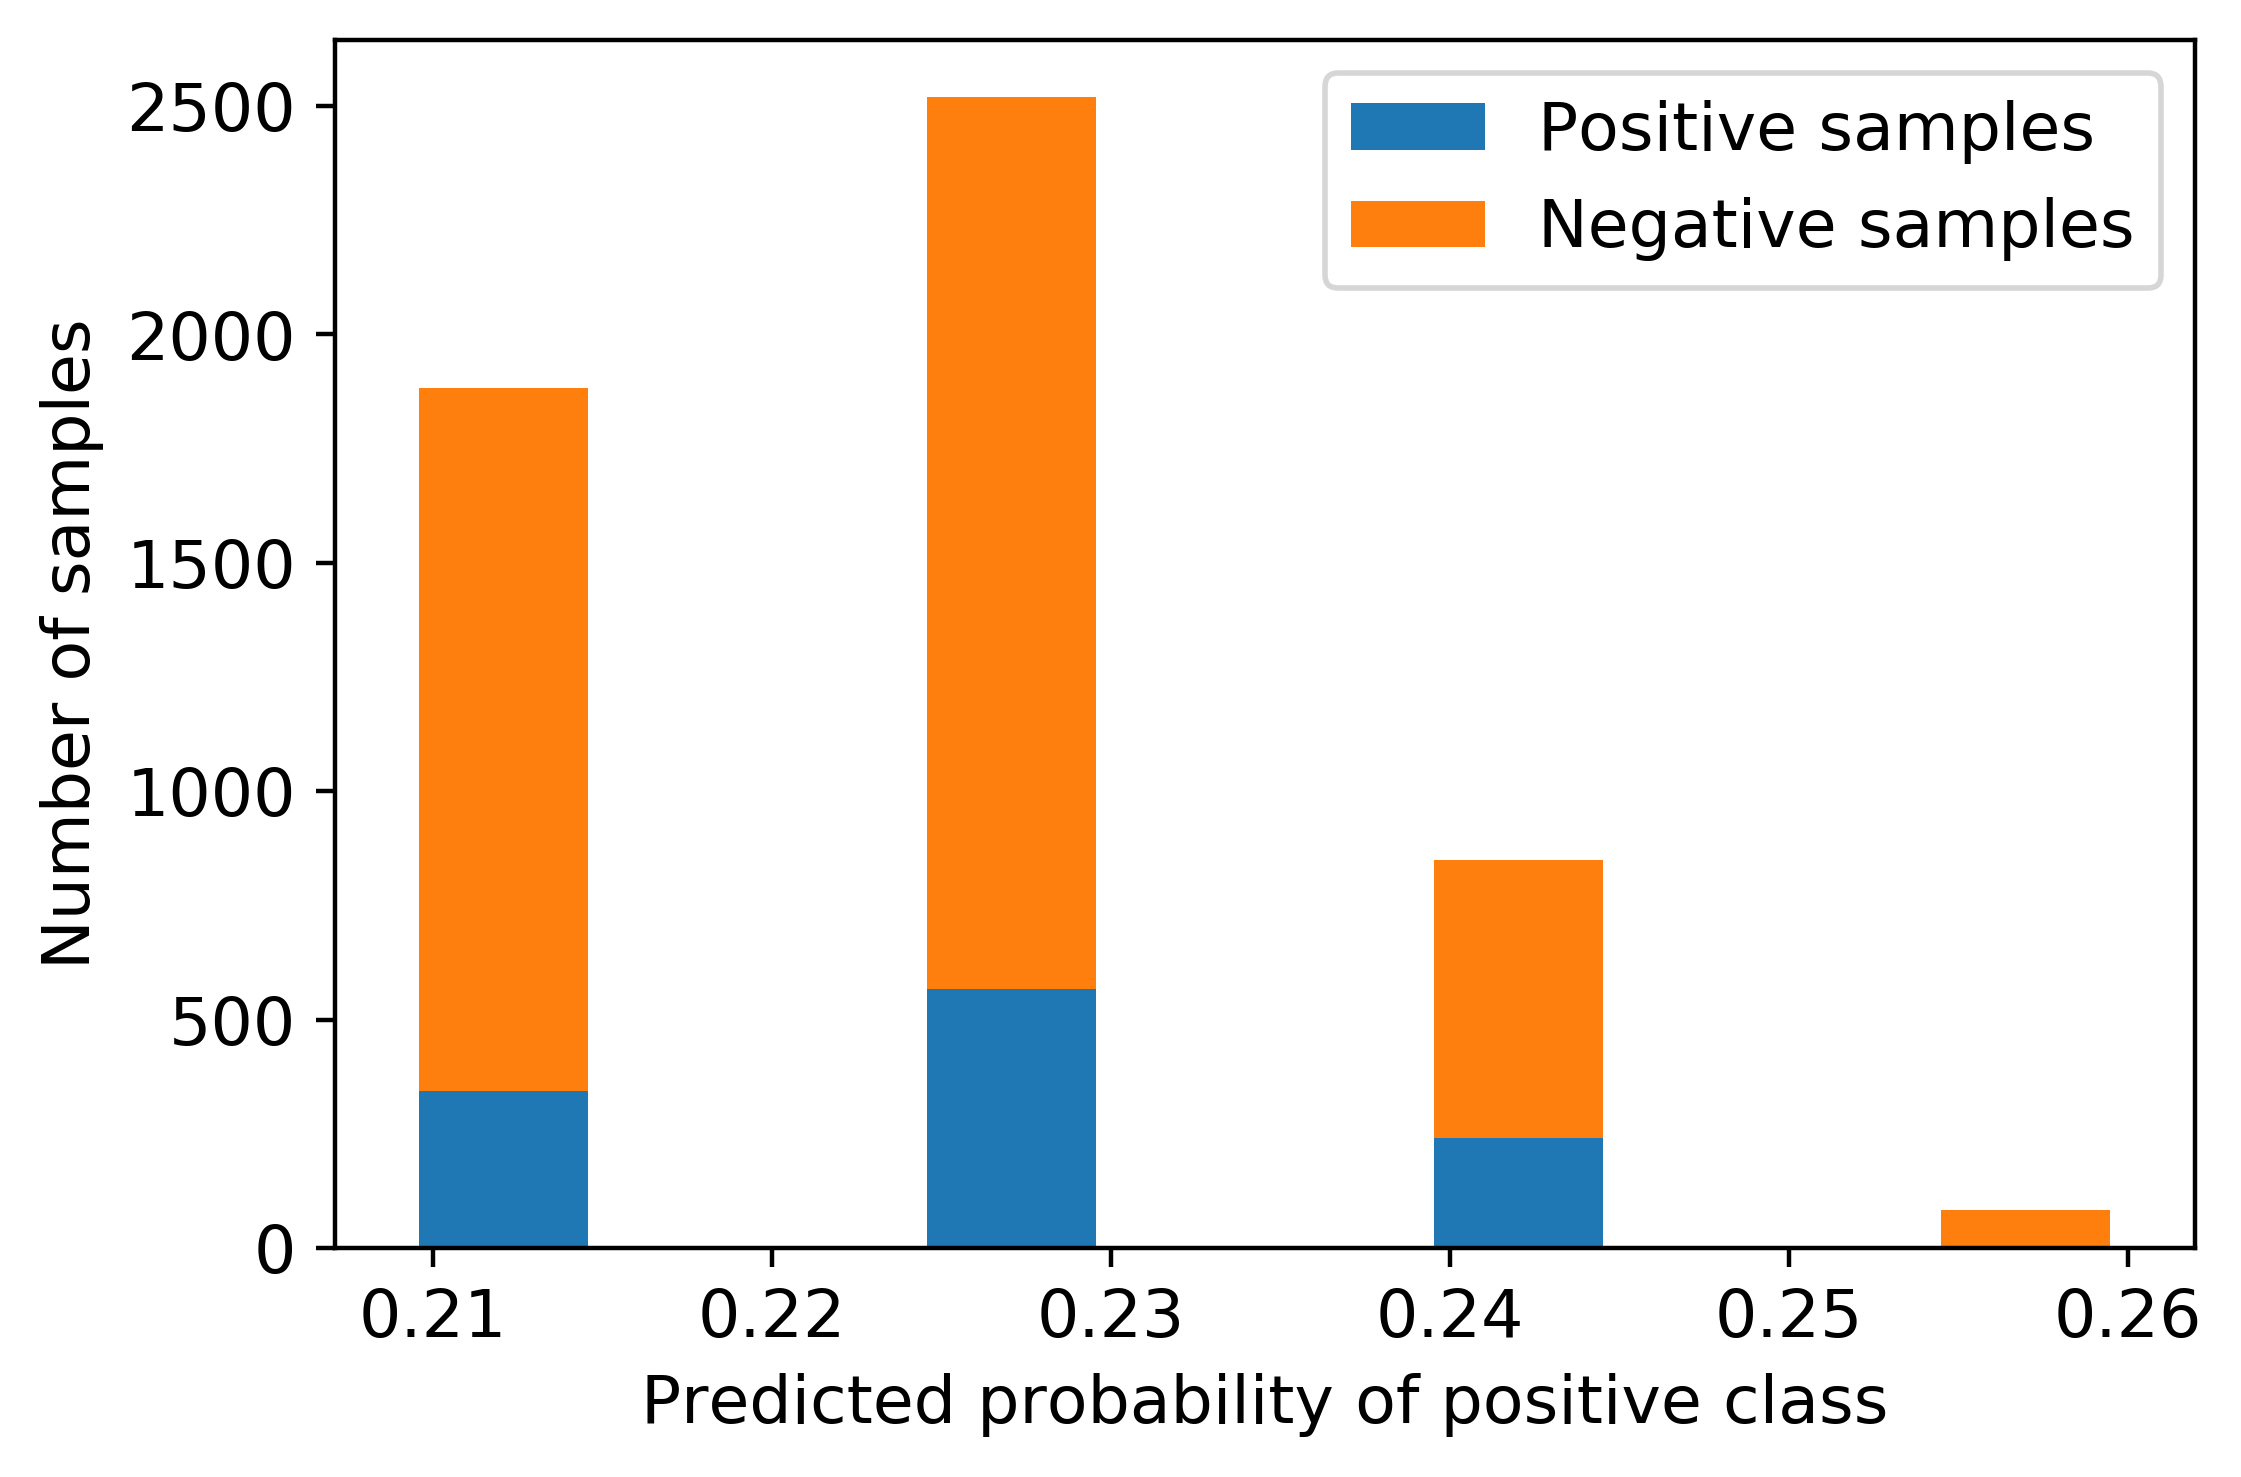

In [64]:
plt.hist([pos_sample_pos_proba, neg_sample_neg_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

We can see that all the samples above 0.25 are actually negative, so we would actually be decreasing the model accuracy by lowering the threshold.

## The Receiver Operating Characteristic (ROC) curve 

The ROC curve is a plot of the TPR (true positive rate) and the FPR (false positive rate) for all the values of the threshold from 0 to 1.

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

In [71]:
thresholds

array([1.25948347, 0.25948347, 0.24203246, 0.22539786, 0.20959039])

Text(0, 0.5, 'TPR')

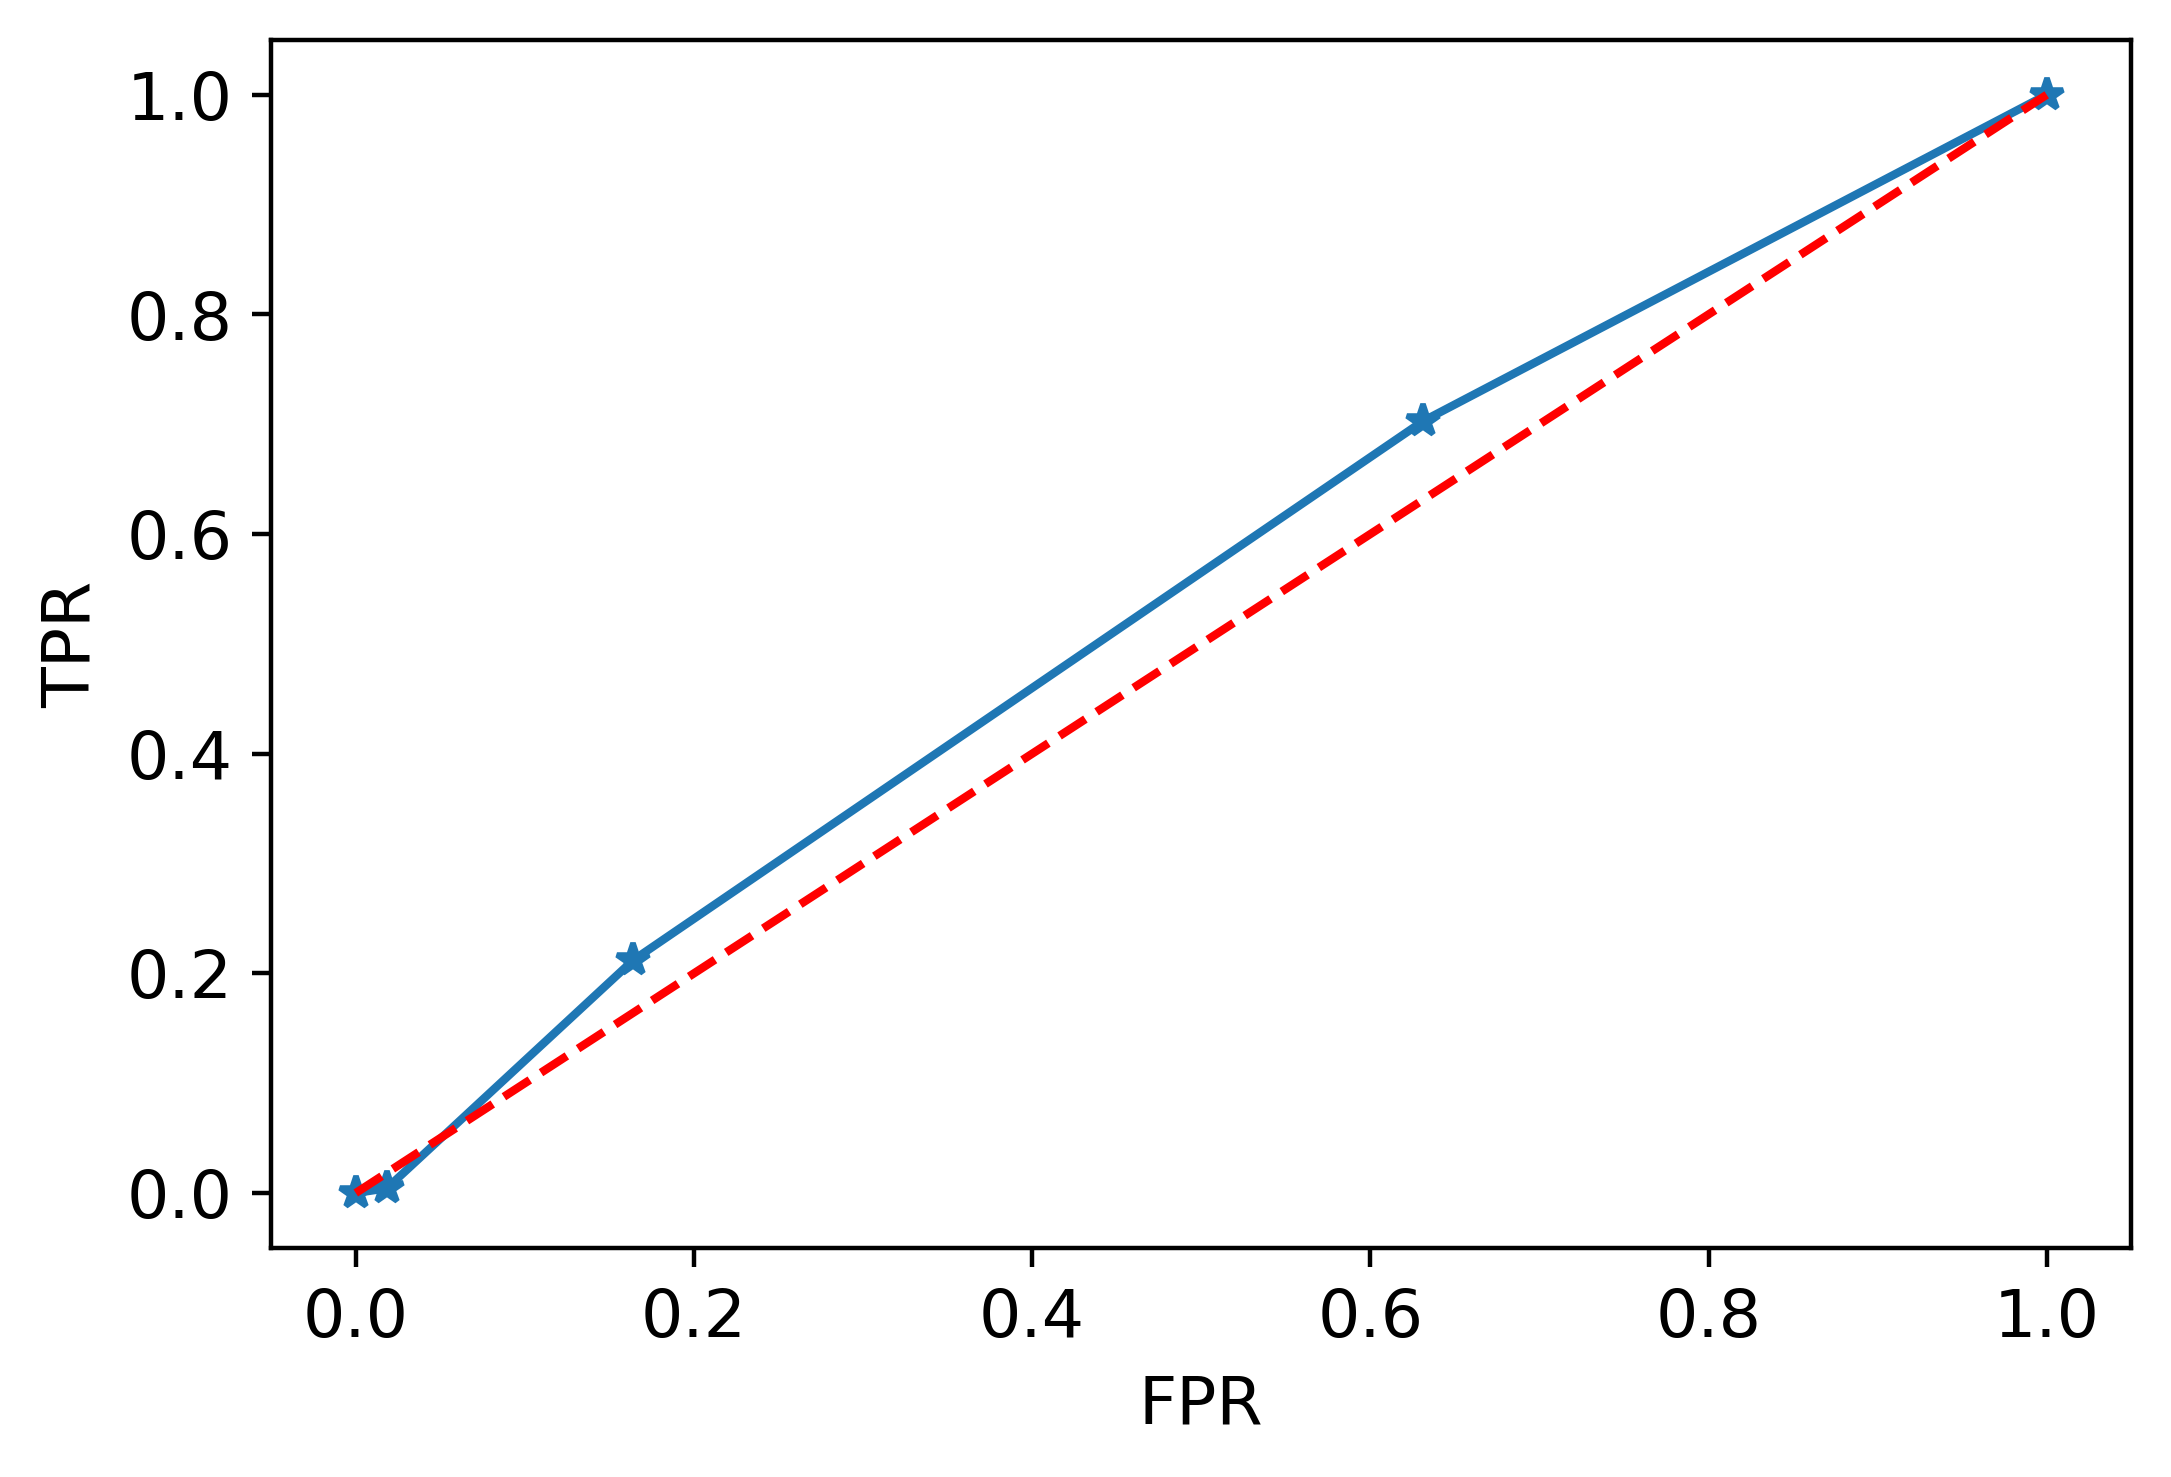

In [72]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [73]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

## Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve 

#### Logistic regression with LIMIT_BAL

In [83]:
X = df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24)

In [85]:
my_lr = LogisticRegression()

In [86]:
my_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### ROC AUC and ROC curve

In [87]:
pred_proba = my_lr.predict_proba(X_test)

In [88]:
metrics.roc_auc_score(y_test, pred_proba[:,1])

0.6201990844642832

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba[:,1])

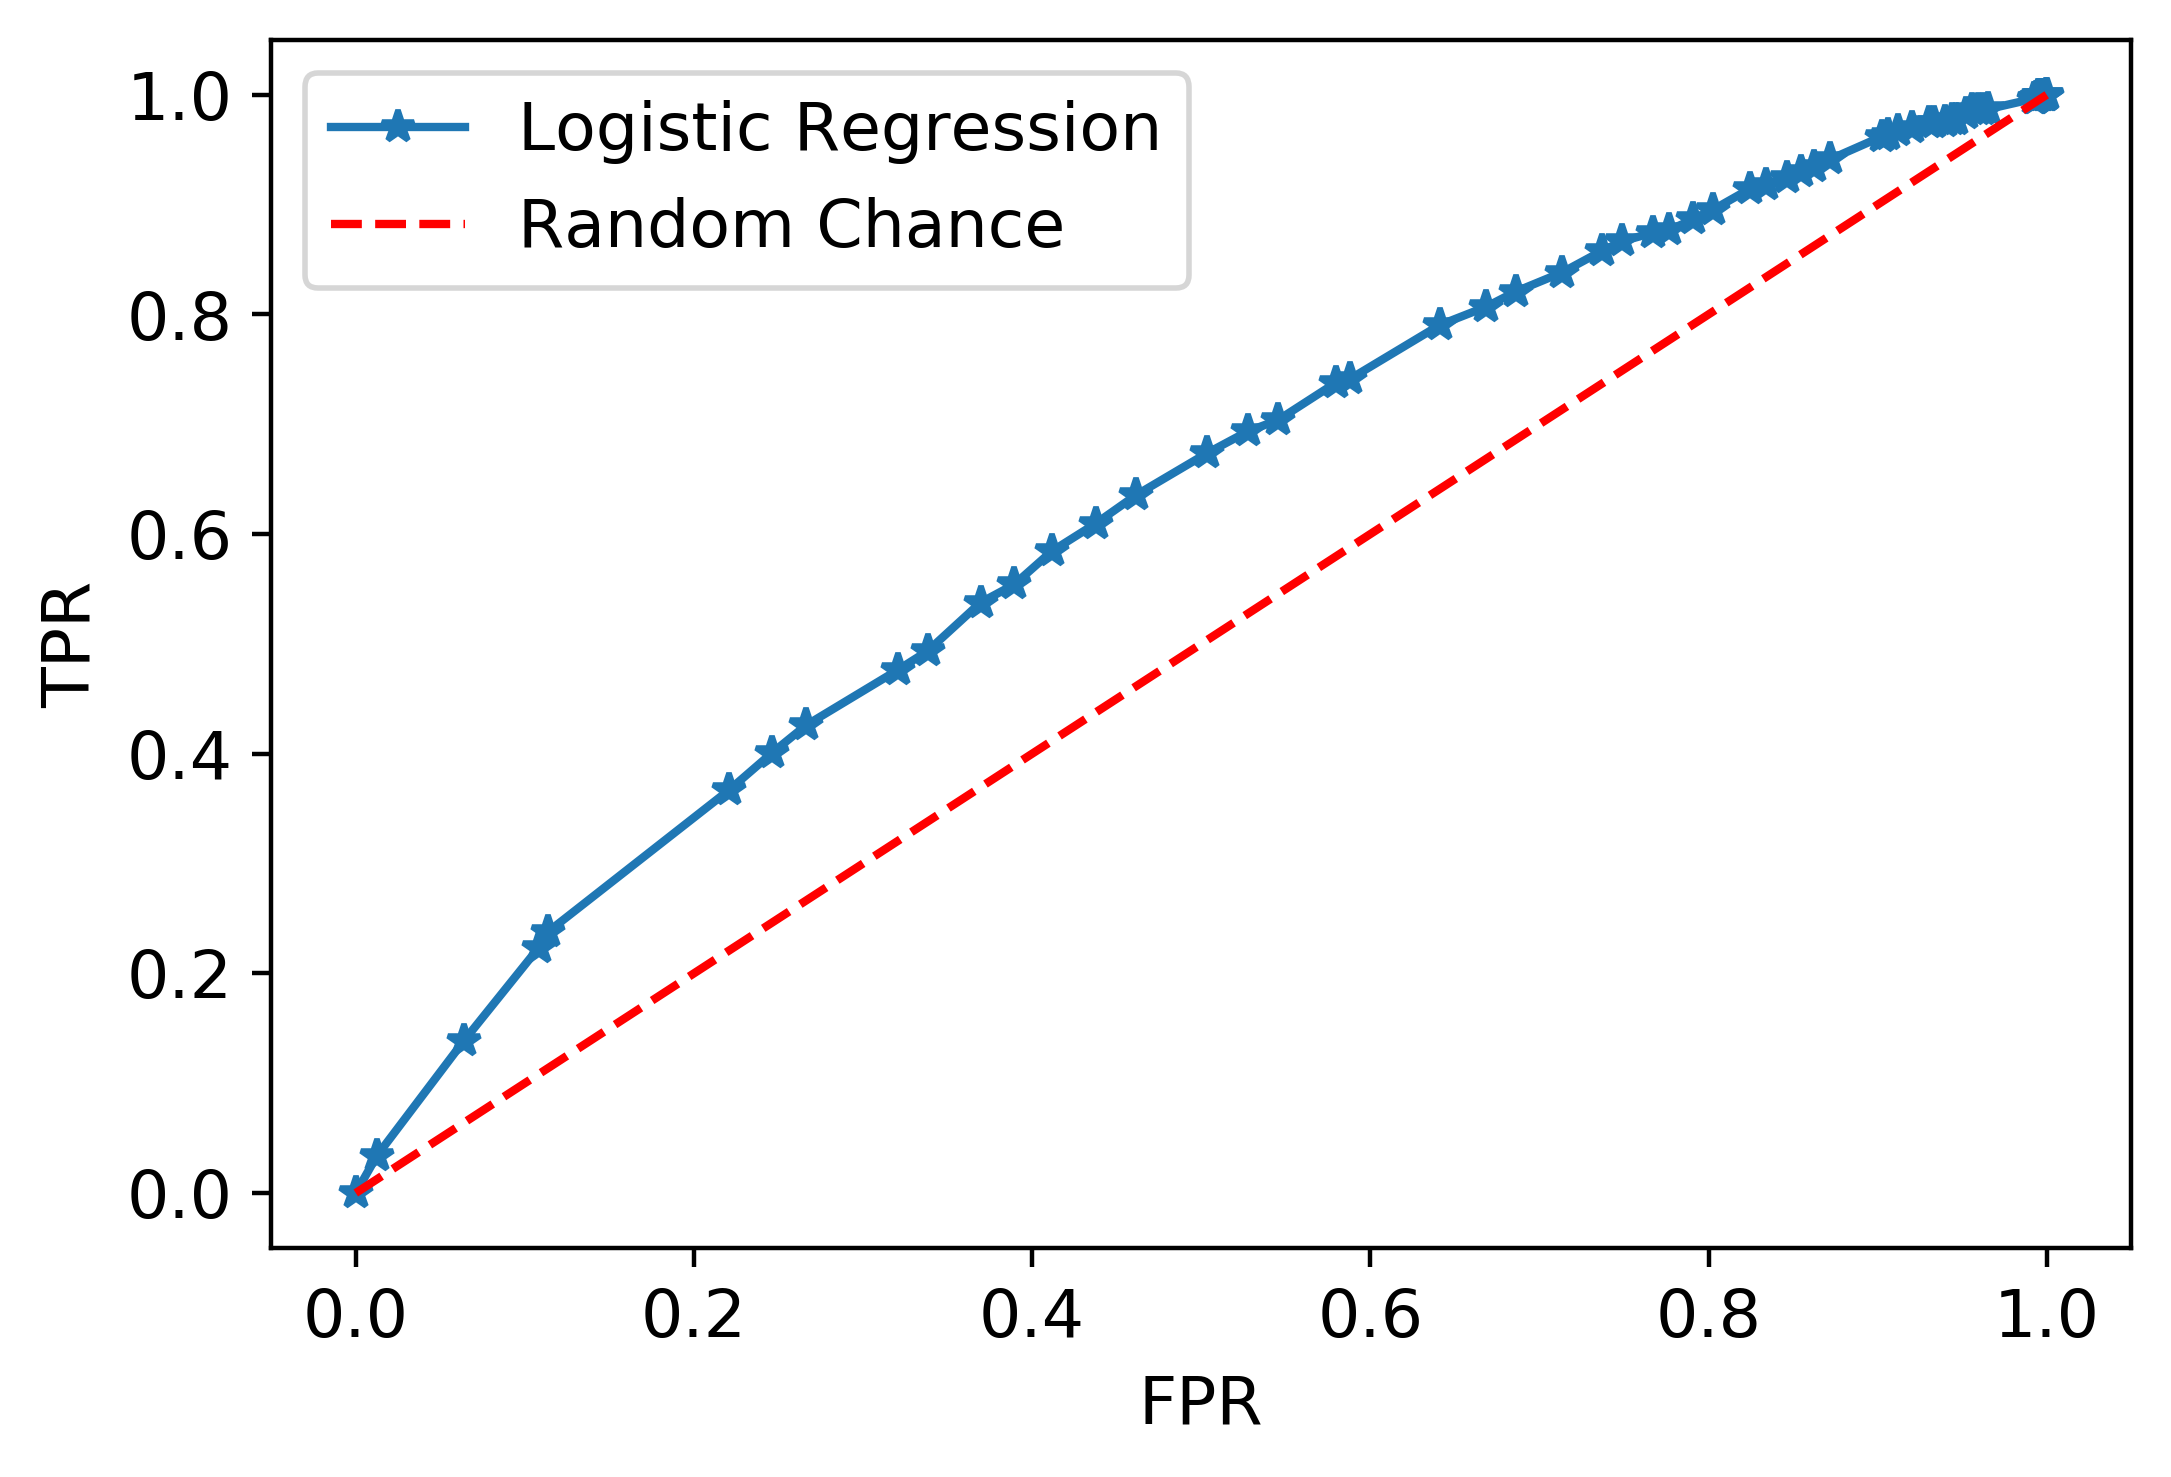

In [94]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression', 'Random Chance'])

#### Precision-recall curve

In [100]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred_proba[:,1])

Text(0, 0.5, 'Precision')

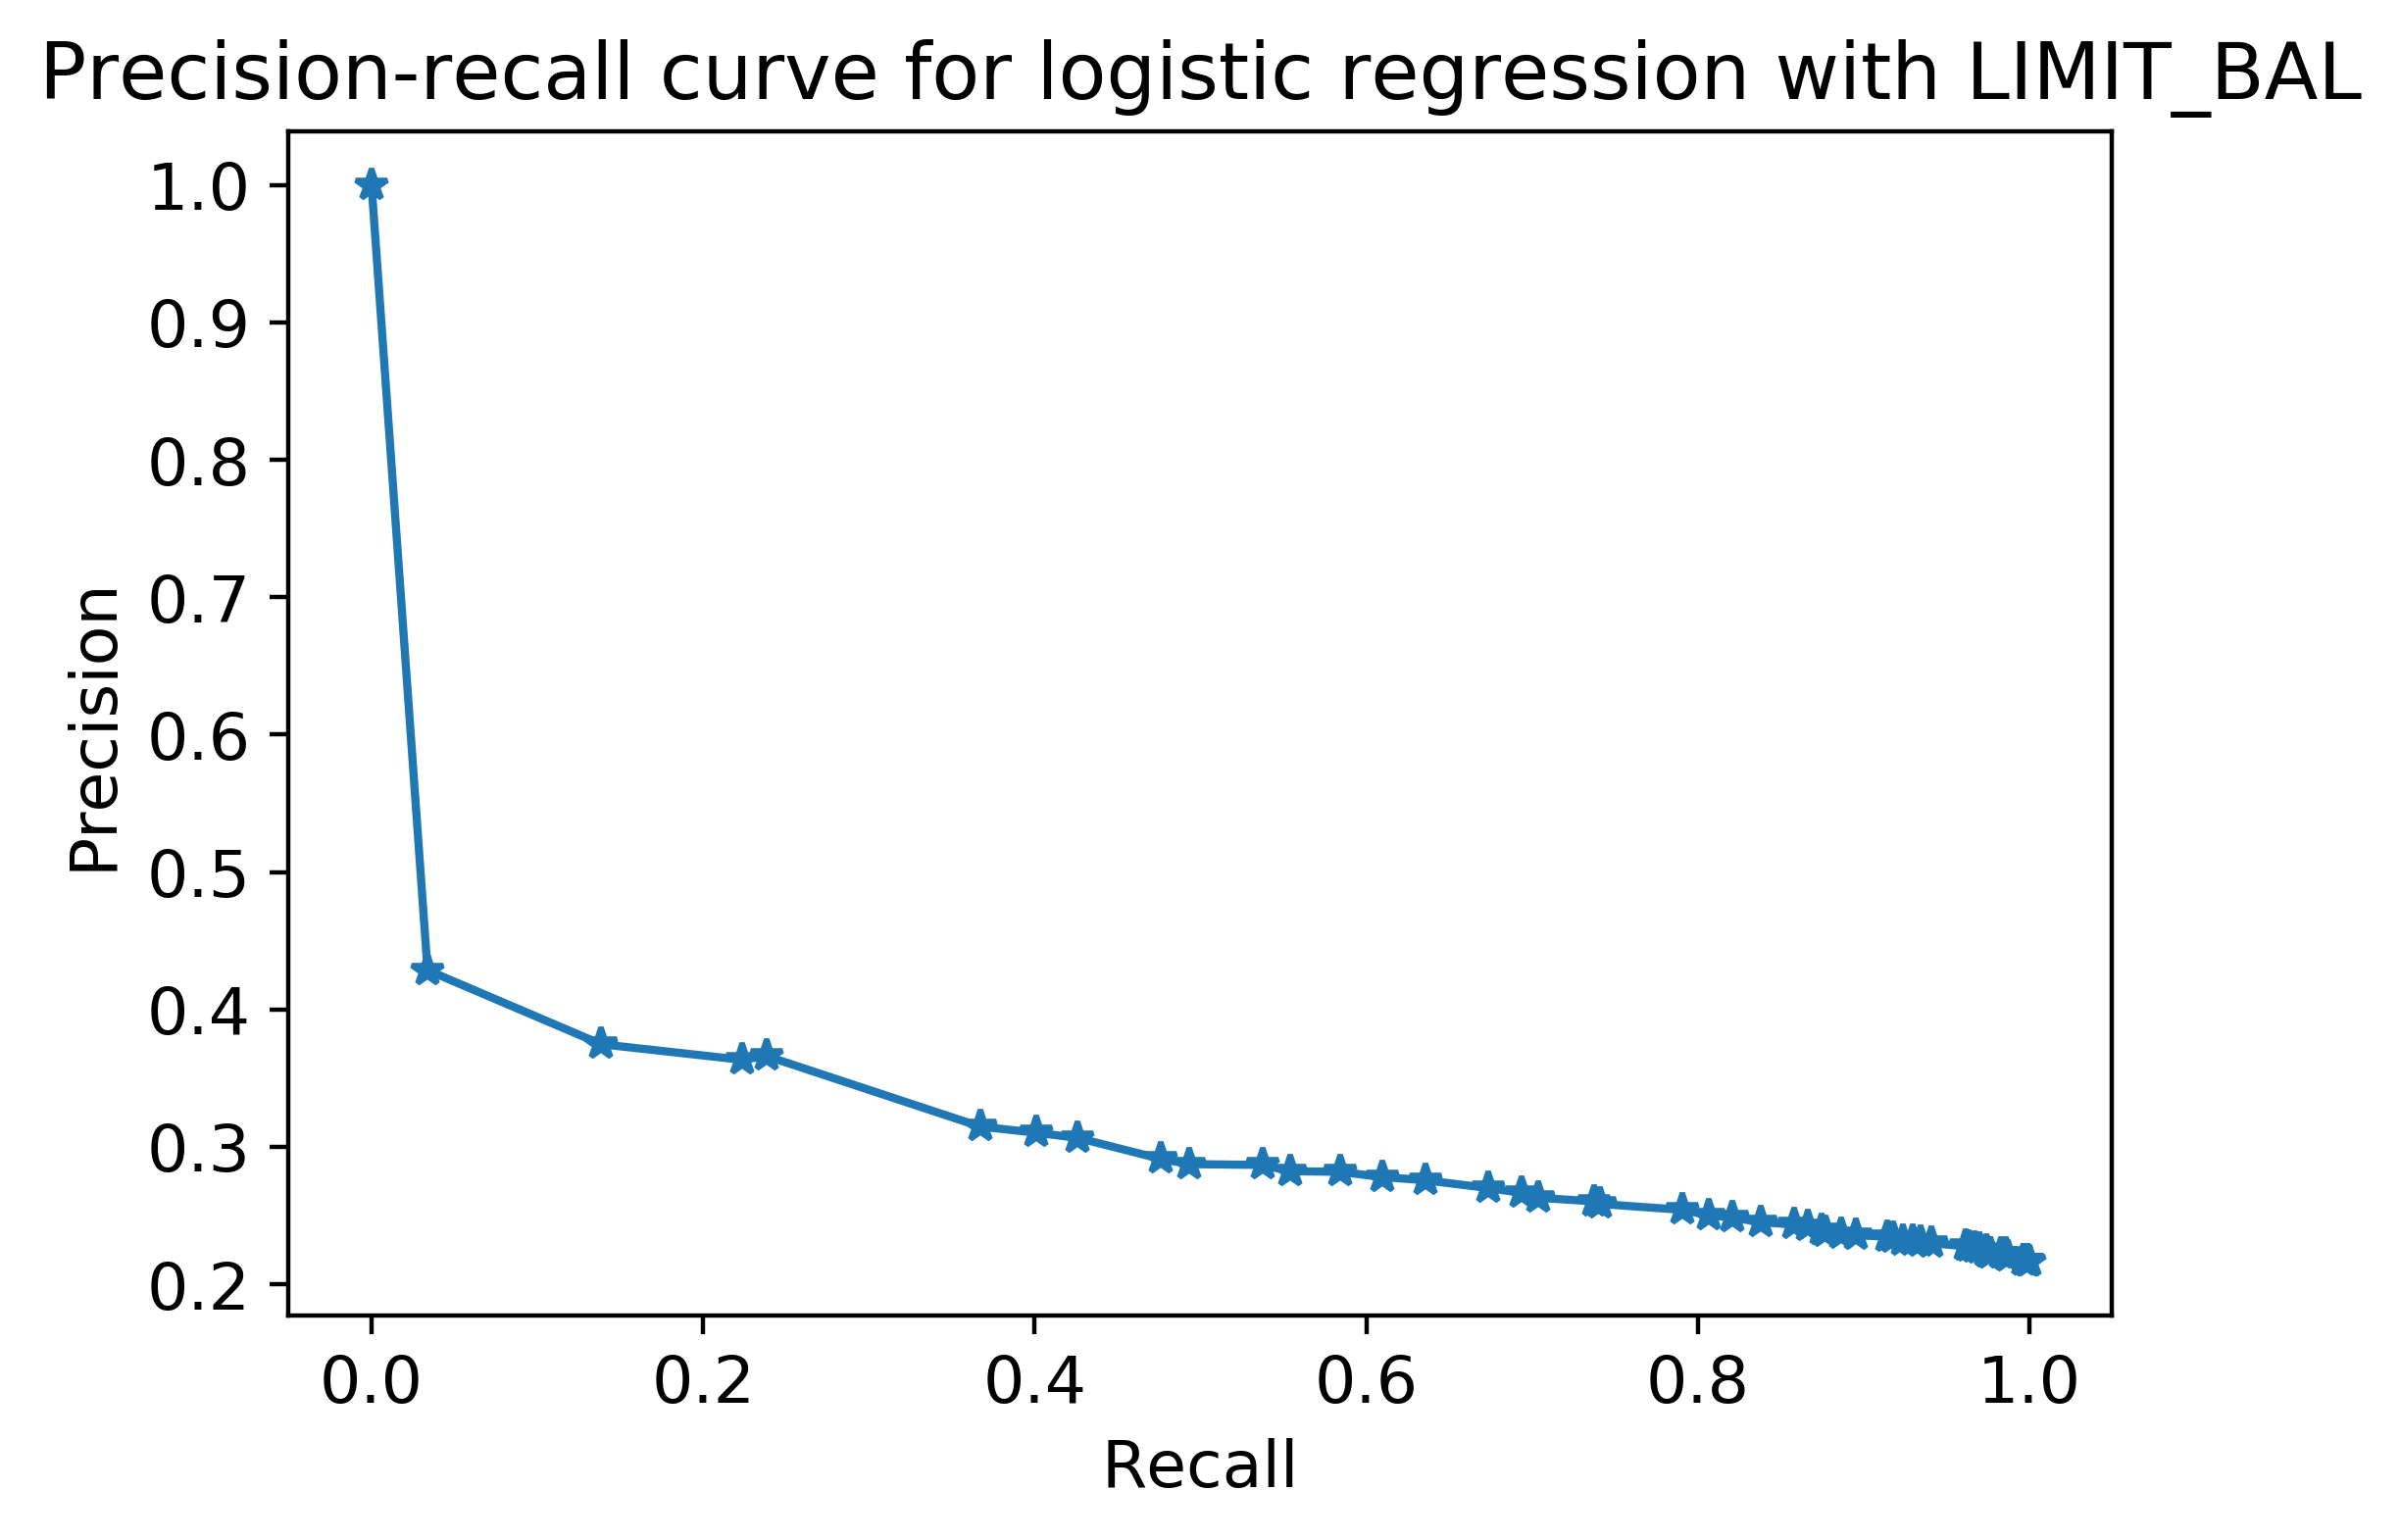

In [102]:
plt.plot(recall, precision, '*-')
plt.title('Precision-recall curve for logistic regression with LIMIT_BAL')
plt.xlabel('Recall')
plt.ylabel('Precision')

#### ROC AUC for training data

In [103]:
train_pred_proba = my_lr.predict_proba(X_train)

In [107]:
metrics.roc_auc_score(y_train, train_pred_proba[:,1])

0.6182918113358344